# Statistical Programming (MATH1176) - Recap

---
___

## Lab 2 

##### Note: Load R packages 

In [250]:
library("dplyr","tydir")
library("ggplot2")


### Exercise 4

Re-write the following code such that you eliminate all loops:
```R
X <- matrix(runif(100000), nrow=1000, ncol=100)
z <- rep(0,1000)
for (i in 1:1000){
for (j in 1:100){
z[i] <- z[i] + X[i,j]
}
}
```
Confirm that all three versions give the same answers, but that your
re-writes are much faster than the original.
Hint: Use apply, rowSums and system.time.

### Answer: 

In [54]:
X <- matrix(runif(100000), nrow=1000, ncol=100)
z0 <- rep(0,1000)

# 1 
z1 <- rowSums(X)

# 2
z2 <- apply(X,1,sum)

---
### Exercise 5

Re-write the following, replacing the loop with efficient code.
```R
n <- 100000
z <- rnorm(n)
zneg <- NULL
j <- 1
for (i in 1:n){
if (z[i]<0){
zneg[j] <- z[i]
j <- j + 1
}
}
````

### Answer:

In [55]:
n <- 100000
z <- rnorm(n)

zneg1 <- z[z<0]

zneg2 <- NULL

j <- 1
for (i in 1:n){
if (z[i]<0){
zneg2[j] <- z[i]
j <- j + 1
}
}


---
### Exercise 8

The empirical cumulative distribution function (c.d.f.) for a set of
measurements $$ \{ x_i : i = 1; \dots ; n \}$$ is 
$$ \hat{F}(x) = \frac{  \# \{ x_i \leq x \}  }{n+1} $$
where $$ \# \{ x_i \leq x \} $$ denotes the number of $x_i$ values less than $x$.

- Write an R function which takes an un-ordered vector of observations x and returns the values of the empirical c.d.f. for each value, in the order corresponding to the original x vector (?sort,?rank).
- Modify your function to take an extra argument plot.cdf, whichwhen true will cause the empirical c.d.f. to be plotted as a stepfunction over a suitable x range.

### Answer


In [56]:
# 1
efd <- function(x){
    n <- length(x)
    num <- rank(x)
    denum <- n+1
    f <- num/denum
    return(f)
}

# 2 
edf2 <- function(x,plot.cdf=TRUE){
    n <- length(x)
    num <- rank(x)
    denum <- n+1
    f <- num/denum
    if(plot.cdf==TRUE){
        xrange <- sort(x)
        yrange <- sort(f)
        plot(xrange,yrange)
    }
    return(f)
}
                   
    

---
---

## Lab3

### Exercise 1
Data from a retrospective sample of males in a heart-disease high-risk region of the Western Cape,
South Africa were taken (from a larger dataset), described in Rousseauw et al, 1983, South African
Medical Journal. There are roughly two controls per case of coronary heart disease (CHD). Many
of the CHD positive men had undergone blood pressure reduction treatment and other programs to
reduce their risk factors after their CHD event. In some cases the measurements were made after
these treatments.

In this lab, we will look at the effect of family history on the probability of CHD. We can treat the
presence of CHD, say $Y$ , conditionally on family history, say X, as a Bernoulli random variable,
i.e., 
$$ Y \mid \sim Bernoulli(\pi)$$ 
The probability mass function is:
$$ Pr(Y=y \mid X) = \pi^{y}(1-\pi)^{(1-\pi)}$$ 
One possible relation between family history and the probability of CHD is :
 
$$ \pi = \frac{e^{u}}{1+e^{u}} = E(Y \mid X)= \mu $$ where 
$$ \eta = \beta_0 + \beta_1$$( the logit link function).


### Answers 

First, we start with some EDA to have a first look at the data:

In [91]:
saf <- read.table("SAheart.txt",header=TRUE,sep=",")
str(saf)
head(saf)

dim(saf)

'data.frame':	462 obs. of  11 variables:
 $ row.names: int  1 2 3 4 5 6 7 8 9 10 ...
 $ sbp      : int  160 144 118 170 134 132 142 114 114 132 ...
 $ tobacco  : num  12 0.01 0.08 7.5 13.6 6.2 4.05 4.08 0 0 ...
 $ ldl      : num  5.73 4.41 3.48 6.41 3.5 6.47 3.38 4.59 3.83 5.8 ...
 $ adiposity: num  23.1 28.6 32.3 38 27.8 ...
 $ famhist  : Factor w/ 2 levels "Absent","Present": 2 1 2 2 2 2 1 2 2 2 ...
 $ typea    : int  49 55 52 51 60 62 59 62 49 69 ...
 $ obesity  : num  25.3 28.9 29.1 32 26 ...
 $ alcohol  : num  97.2 2.06 3.81 24.26 57.34 ...
 $ age      : int  52 63 46 58 49 45 38 58 29 53 ...
 $ chd      : int  1 1 0 1 1 0 0 1 0 1 ...


row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0


[1] 462  11

[1] 42.82

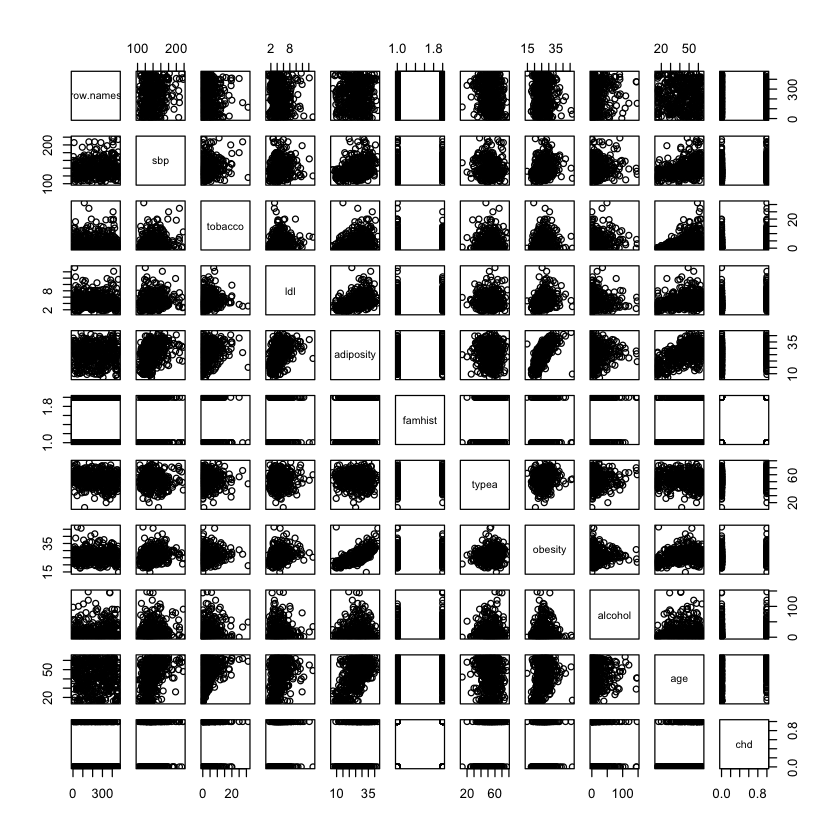

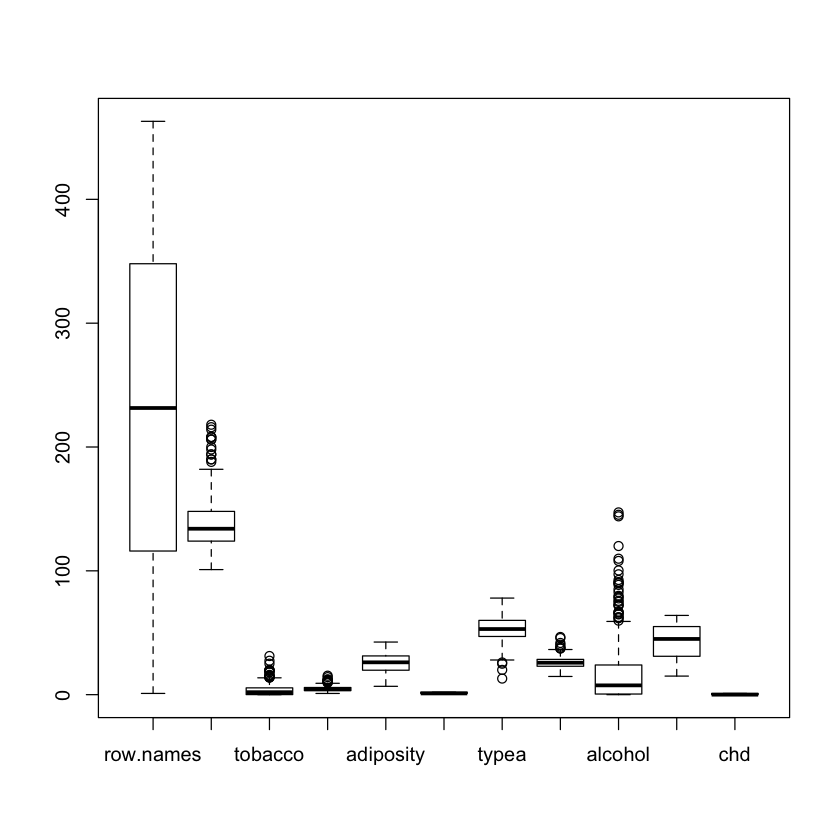

In [14]:
round(mean(saf[,'age'], na.rm=TRUE),2)
pairs(saf)
boxplot(saf)

---
#### Log-likelihood function

In [2]:
x <- saf[,6]
y <- saf[,11]

x.numeric <- as.numeric(x) -1

In [144]:
# Log-likelihood function 

llik.log <- function(x,y,beta0,beta1){
    llik = sum(y*(beta0+beta1*x)-log(1+exp(beta0+beta1*x)))
    return(llik)
}

In [145]:
llik.log(runif(100,0,1),rnorm(100,0,1),beta0=2.3,beta1=0.65)

[1] -265.9179

In [67]:
beta0 <- seq(-5,4.9,by=0.1)
beta1 <- seq(-5,4.9,by=0.1)
llik <- matrix(nrow = 100,ncol = 100)

for(i in 1:length(beta0))
for(j in 1:length(beta1))
{
llik[i,j] <- llik.log(x.numeric,y,beta0[i],beta1[j])
}

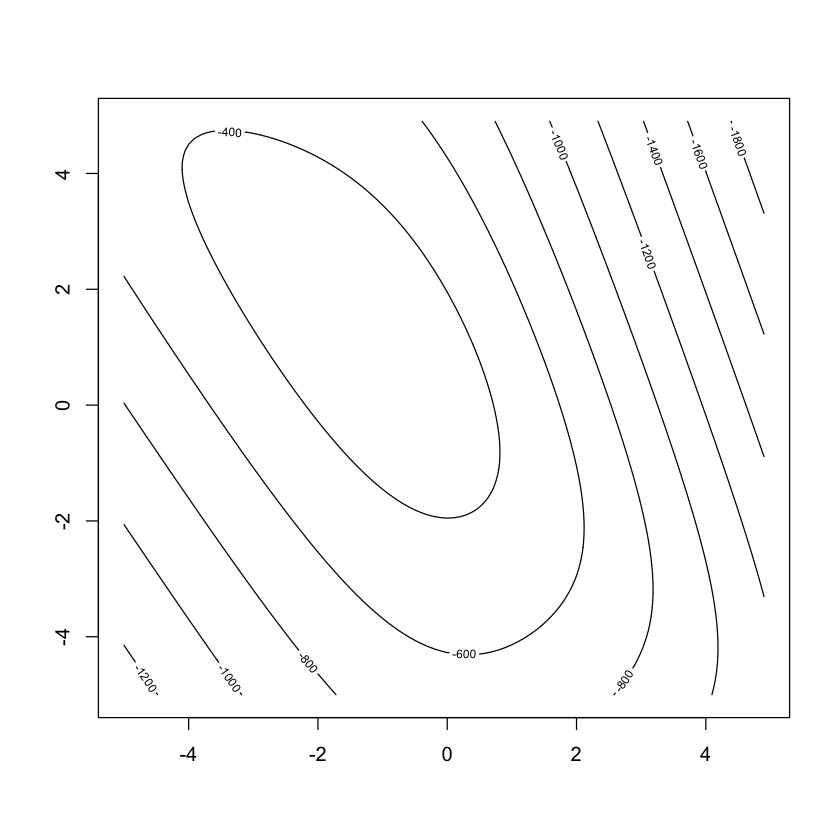

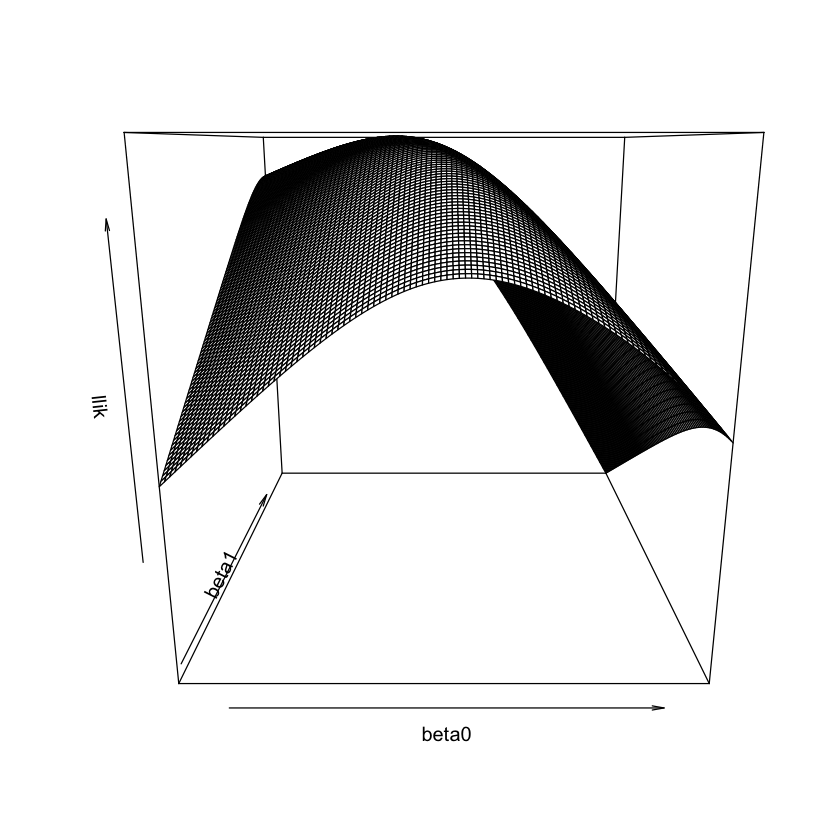

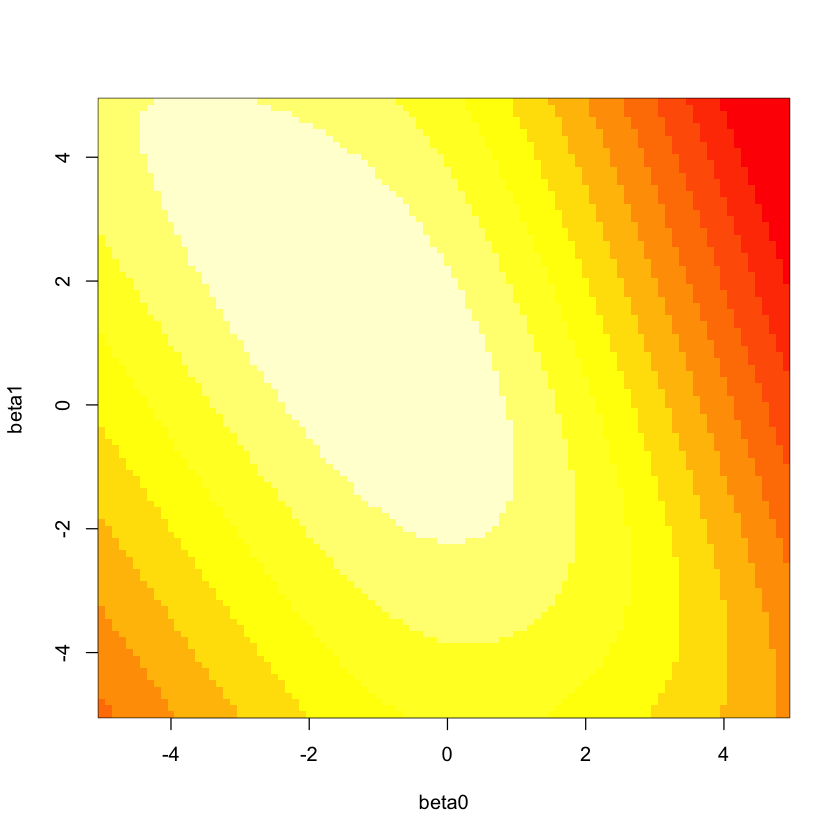

In [78]:
contour(beta0,beta1,llik)
persp(beta0,beta1,llik)

image(beta0,beta1,llik)

---
#### Gradient function

In [135]:
grad.log <- function(x,y,beta0,beta1,scaled =TRUE){
    
    grad.beta0 <- sum(y-1/(1+exp(-(beta0+beta1*x))))
    grad.beta1 <- sum(x*y) -sum(x/(1+exp(-(beta0+beta1*x))))
    grad.llik <- c(grad.beta0,grad.beta1)
    
    if (scaled==TRUE){
        grad.beta0.scaled <- grad.beta0/sqrt(grad.beta0^2+grad.beta1^2)
        grad.beta1.scaled <- grad.beta1/sqrt(grad.beta0^2+grad.beta1^2)
        grad.llik.scaled <- c(grad.beta0.scaled,grad.beta1.scaled)
        return(grad.llik.scaled)
    }
    
    else{
        return(grad.llik)
        }
}

In [136]:
a=runif(100,0,1)
b=rnorm(100,0,1)
c=2.3
d=0.65
grad.log(a,b,beta0=2.3,beta1=0.65,scaled = TRUE)
e=sum(y-1/(1+exp(-(c+d*x.numeric))))
f=sum(x.numeric*y) -sum(x.numeric/(1+exp(-(c+d*x.numeric))))
g=e/sqrt(e^2+f^2)
h=f/sqrt(e^2+f^2)
e
f
g
h

[1] -0.8862126 -0.4632787

[1] -267.8474

[1] -86.45059

[1] -0.9516586

[1] -0.3071579

In [104]:
dimname <- list("beta0","beta1","grad")
grad <- array(data=NA,dim=c(length(beta0),length(beta1),2))

In [137]:
for(i in 1:length(beta0))
for(j in 1:length(beta1))
for(k in 1:2)
{
grad[i,j,k] <- grad.log(x.numeric,y,beta0[i],beta1[j],scaled=TRUE)[k]
}

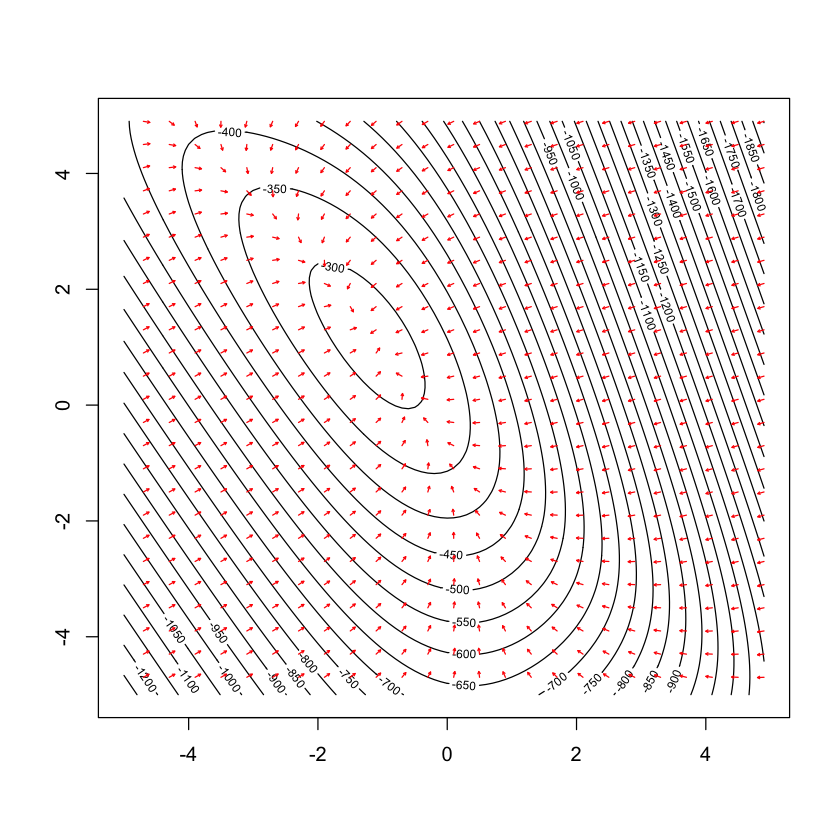

In [143]:
contour(beta0,beta1,llik,nlevels=50)

for(i in 1:length(beta0))
for(j in 1:length(beta1))
{
if(i%%4==0 & j%%4==0)
{
arrows(beta0[i],beta1[j],
beta0[i] + grad[i,j,1]/10,
beta1[j] + grad[i,j,2]/10,
length=0.02,col=2)
}
}

#### Steepest ascent algorithm

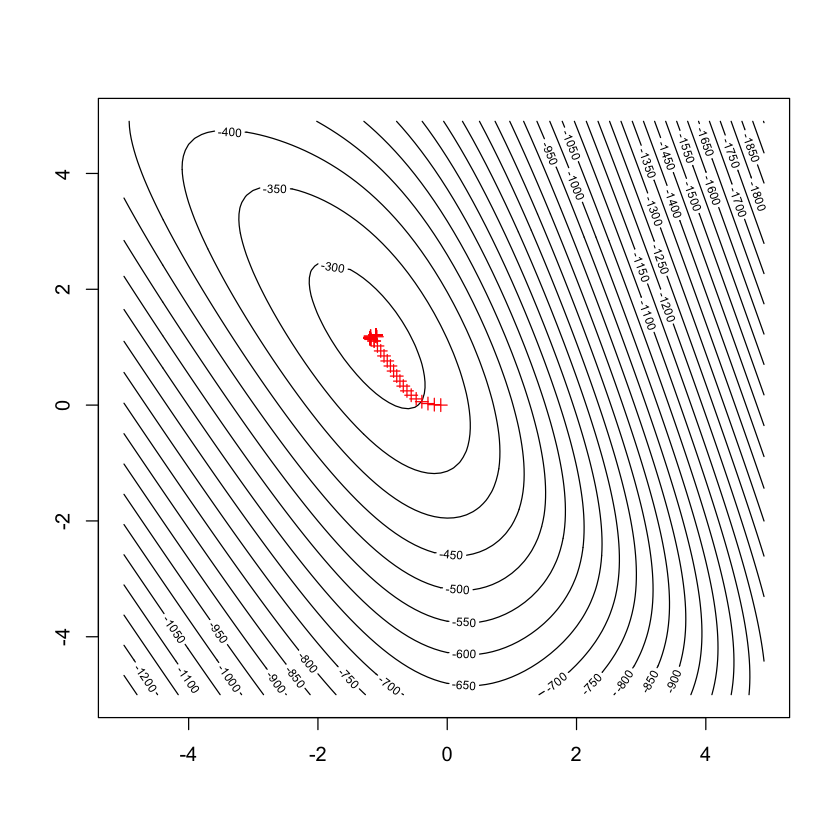

In [167]:
Nsteps <- 1000
alpha <- 0.1
beta <- c(0,0)
val <- llik.log(x.numeric,y,beta[1],beta[2])
contour(beta0,beta1,llik,nlevels=50)
for(i in 1:Nsteps)
{
beta <- beta + alpha*grad.log(x.numeric,y,beta[1],beta[2],scaled = TRUE)
points(beta[1],beta[2],pch=3,col=2)
}

#### (Optional) Gradient descent 

In [173]:
cost <- function(x,y,beta0,beta1){
    cost.function <- 0.5* sum((exp(beta0+beta1*x)/(1+exp(beta0+beta1*x))-y)^2)
    return(cost.function)
}

In [179]:
cost(x.numeric,y,0.2,0)
grad.log(x.numeric,y,0.2,0,scaled = TRUE)
alpha*0.5*cost(a,b,0,0)*grad.log(x.numeric,y,beta[1],beta[2],scaled = TRUE)
alpha*0.5*cost(a,b,0,0)*grad.log(x.numeric,y,beta[1],beta[2],scaled = TRUE)

[1] 61.86189

[1] -0.9948620 -0.1012405

[1] -0.24232932 -0.09559204

[1] -0.24232932 -0.09559204

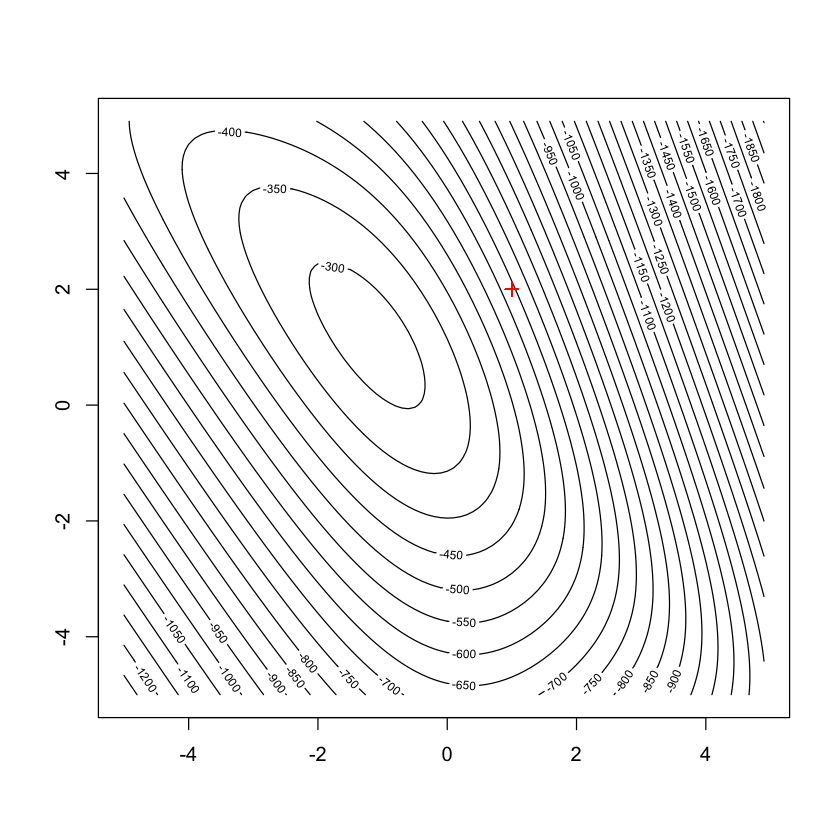

In [177]:
Nsteps <- 10000
alpha <- 0.01
beta <- c(1,2)
val <- llik.log(x.numeric,y,beta[1],beta[2])
contour(beta0,beta1,llik,nlevels=50)
for(i in 1:Nsteps)
{
beta <- beta - alpha*0.5*grad.log(x.numeric,y,beta[1],beta[2],scaled = TRUE)*cost(x.numeric,y,beta[0],beta[1])
points(beta[1],beta[2],pch=3,col=2)
}

---
---
## Lab 4 

### Exercise 1

Write a function called llik_log_p that takes as arguments objects beta (vector of parameters), X (matrix of covariates), y (CHD data vector) and returns the log-likelihood of $$\mathbf{\beta}$$ given the data $$ (\mathbf{x},y)$$
i.e.,

$$ l(\pmb{\beta}) = \sum_{i=1}^{n}y_i \Bigl( \beta_0 + \sum_{j=1}^{p} \beta_j
x_{i,j} \Bigr) - \sum_{i=1}^{n}log( \{ 1+e^{\beta_0 + \sum_{j=1}^{p} \beta_j
x{i,j}} \} $$

where $$x_{i,j}$$ denotes the i-th observation of the j-th variable. Your function should have beta as its
first argument and must return error/warning when the length of $$\beta$$ is not equal to ```dim(X)+1```.

### Answer:


In [193]:
llik.log.p <- function(beta,x,y){
    
    beta <- as.matrix(beta)
    
    id.vec <- rep(1,nrow(X))
    X  <- as.matrix(cbind(id.vec,x))
    
    
    #stopifnot(is.matrix(X.mat))

    llik <- sum(y*(X %*% beta))-sum(log(1+exp(X %*% beta)))
    
    return(llik)
}

In [194]:
llik_log_p<- function(beta,x,y)
{
#stopifnot(is.matrix(x))
beta <- matrix(beta,ncol=1)
X <- cbind(rep(1,dim(x)[1]),x) %>% as.matrix
((y*(X%*%beta)) %>% sum) - (1+exp((X%*%beta)) %>% log %>% sum)
}

In [195]:
X <- saf[,2:10]
a <- as.numeric(X[,5])-1
X[,5] <- a


llik.log.p(beta,X,y)
llik_log_p(beta,X,y)

[1] -36926.61

[1] -36927.61

 ---
 ### Exercise 2:
Use optim to find the maximum likelihood estimate of $ \pmb{\beta} = (\beta_1, \beta_2,\beta_3, \beta_4, \beta_5)$, where
$\beta_1, \beta_2,\beta_3, \beta_4, \beta_5 $,  correspond to the coefficients of adiposity, obesity, alcohol, tobacco and family history, respectively. Experiment with Nelder-Mead (maxit=10000) and BFGS methods and use system.time
to assess their performance based on CPU time needed to maximise the function. Which variables
seem to influence CHD the most? What happens if we decrease the number of polytope moves to 500. Does the algorithm converge?

### Answer:

In [202]:
beta.init <- rep(0,6)
X <- saf[,c(3,5,6,8,9)]
a <- as.numeric(X[,"famhist"])-1
X[,'famhist'] <- a
X <-as.matrix(X)

model <- optim(beta.init, fn=llik.log.p,x=X, y=y, 
              control=list(fnscale=-1, maxit=10000),method="BFGS")

model


$par
[1] -1.514320218  0.113964777  0.087179284  1.084547713 -0.088758736
[6] -0.001268723

$value
[1] -254.1745

$counts
function gradient 
      54       12 

$convergence
[1] 0

$message
NULL

In [ ]:
### Optim solution

In [245]:
x.sol <- saf %>% select("adiposity",
"obesity",
"famhist",
"tobacco",
"alcohol")
x.sol$famhist <- ( x.sol$famhist=="Present") %>% as.numeric
x.sol <- x.sol %>% as.matrix
y.sol <- saf$chd

model.sol <- optim(c(0,0,0,0,0,0), fn=llik_log_p,x=x.sol, y=y.sol, 
              control=list(fnscale=-1, maxit=10000),method="Nelder-Mead")
model.sol

$par
[1]   6.147039 -11.476071  -6.604865 -13.747263   5.882873  -1.488979

$value
[1] 136352.4

$counts
function gradient 
    4543       NA 

$convergence
[1] 0

$message
NULL

---
### Exercise 3

Plot the estimated probability curve $\hat{\pi}$ as a function of obesity for a non-smoker with family history
of CHD, adiposity variable value equal to 26 and alcohol variable value equal to 23.

### Answer: 

In [210]:
X %>% filter(tobaco==0)
X[,""]
id.vec <- rep(1,nrow(X))
X  <- as.matrix(cbind(id.vec,x))

beta.fitted <- as.matrix(model$par)

pred.prob <- exp(X %*% beta.fitted)/(1+exp(X %*% beta.fitted))

In [218]:
#X <- saf %>% select("adiposity","obesity","famhist","tobacco","alcohol") %>%
             #transmute_at("adiposity"=rep(26,nrow(X),"famhist"=,"tobacco","alcohol")
#X <- data.frame

In [226]:
obesity <- saf %>% select("obesity")
df <- data.frame(adiposity = rep(26,nrow(saf)),obesity=obesity,famhist=rep(1,nrow(saf)),
                 tobacco=rep(0,nrow(saf)),alcohol=rep(23,nrow(saf)))

x <- as.matrix(cbind(rep(1,nrow(x)),df))
beta.fitted <- as.matrix(model$par)

prob.fn <- exp(x %*% beta.fitted)/(1+exp(x %*% beta.fitted))

df$prob.fn <- prob.fn

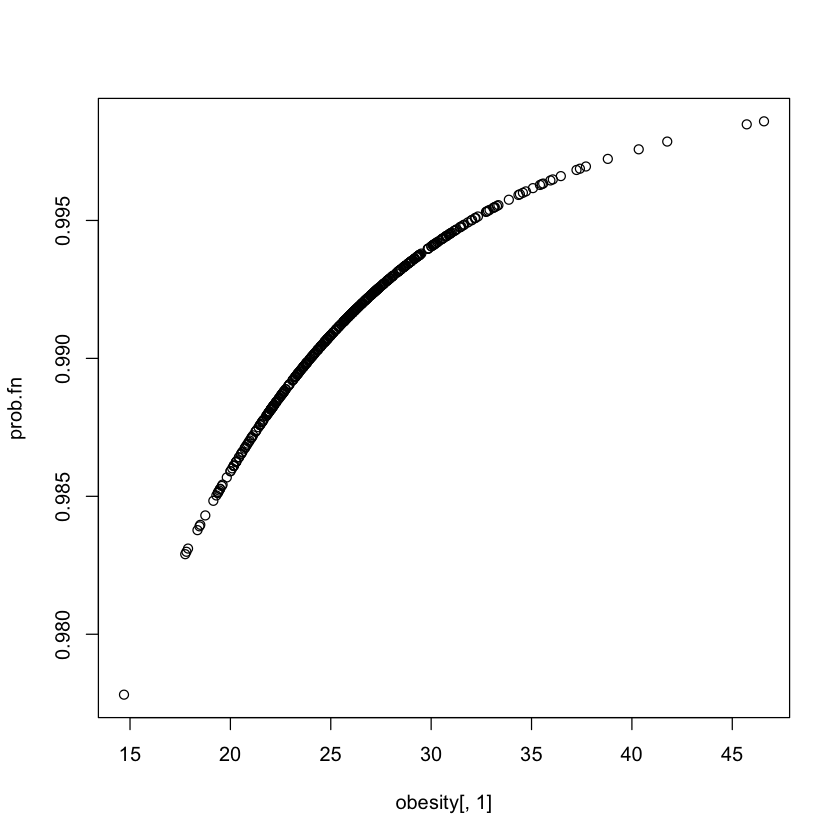

In [239]:
plot(x=obesity[,1],y=prob.fn)


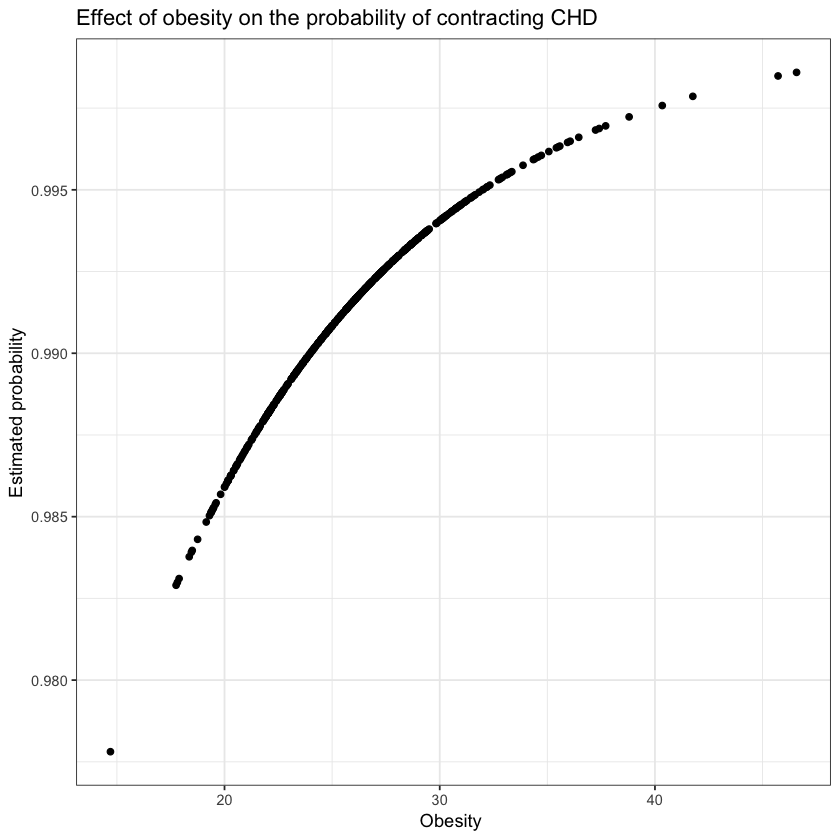

In [253]:
ggplot(df,aes(x=obesity,y=prob.fn)) +
geom_point()+
xlab("Obesity ") + ylab("Estimated probability")+
ggtitle("Effect of obesity on the probability of contracting CHD")+
theme_bw()

---
---
##  Lab 5  

### Exercises 2

Write a function in R called sim.weibull that takes 3 arguments: n (sample size), lambda (scale
parameter) and gamma (shape parameter), and returns a sequence of numerical values
$( x_1,\dots,x_n)=\Big(F^{-1}(u_1;\lambda,\gamma),\dots,F^{-1}(u_n;\lambda,\gamma)\Big)$ where $u_1,\dots,u_n$ is a random sample from Uniform(0;1)
